<a href="https://colab.research.google.com/github/moniquemichels/Data-Science/blob/main/Portf%C3%B3lio_EBAC_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploração e análise de dados de um dataset de crédito com SQL**

> Projeto final – Curso SQL – EBAC

Os dados representam informações de clientes de um banco de crédito obtido no kaggle e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade dos clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses


>> A tabela foi criada no AWS Athena junto com o S3 Bucket

In [ ]:
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION <sua-localizacao>
TBLPROPERTIES ('has_encrypted_data'='false');
) LOCATION ‘s3://projetofinal-monique//’
TBLPROPERTIES ('has_encrypted_data'='false');


**Exploração de dados**

In [ ]:
select * from credito;

Resultado da query
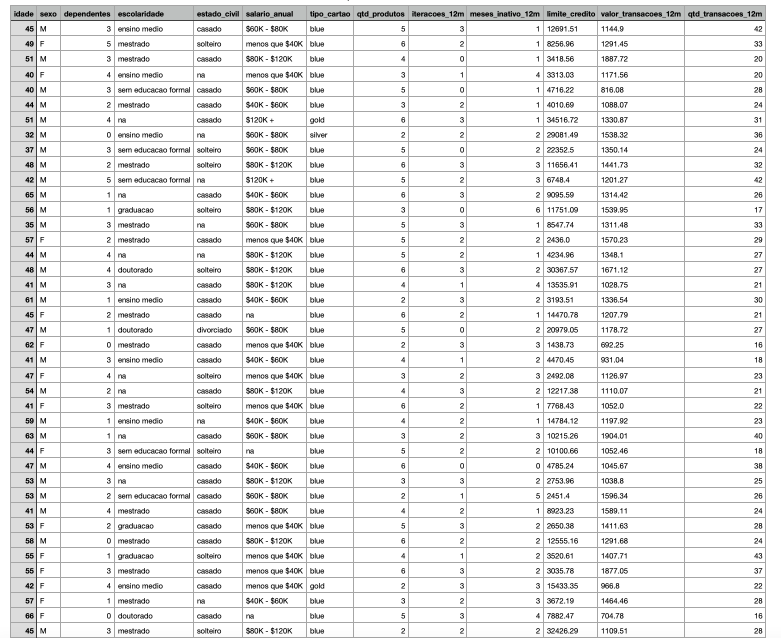



* aqui é apresentado a tabela parcial do dataset

**Agora vamos explorar estes dados?**

* qual a quantidade de informações (linhas) temos nessa tabela?

In [ ]:
select count(*) from credito

* essa query resultou na contagem de linhas da planilha, apresnetando um total de 2564 linhas

* 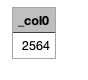

Agora vamos explorar como são estes dados, para isso usamos a seguinte query:

In [ ]:
 DESCRIBE credito

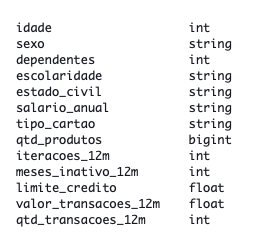

A query resultou na descrição do tipo de variáveis que a tabela possui, algumas numéricas outras não

**Quais são os tipos de escolaridade disponíveis no dataset?**

In [ ]:
SELECT DISTINCT escolaridade FROM credito

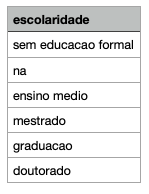

A query resultou nos tipos de escolaridade: sem educação formal, na (nao aplicável), ensino médio, mestrado, graduação e doutorado.
* lembrando que para análises de big data voce pode selecionar todos os dados ou excluir, por exemplo, os na (nao aplicável) quando não forem relevantes, para isso usa-se o comando != 'na' .

> Continuando: Próxima pergunta

**Quais são os tipos de cartão disponíveis no dataset?**

In [ ]:
SELECT DISTINCT tipo_cartao FROM credito

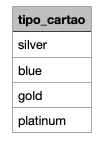

A query resultou nos tipos de cartão: silver, blue, gold e platinum

**Até agora foi realizado apenas uma análise descritiva dos dados do dataset, agora vamos correlacionar os dados e obter alguns insights significativos**

>> Pergunta 1: Nesse banco de dados, quantos clientes temos de cada faixa salarial?

In [ ]:
select count(*), salario_anual from credito group by salario_anual

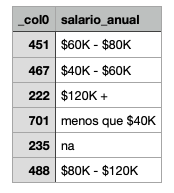

Resultado da query: A maioria dos clientes dessa base de dados possui um renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial.

>> Pergunta 2: Nesse banco de dados, quantos clientes são homens e quantos são mulheres? Qual gênero prevalece?

In [ ]:
select count(*), sexo from credito group by sexo

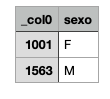

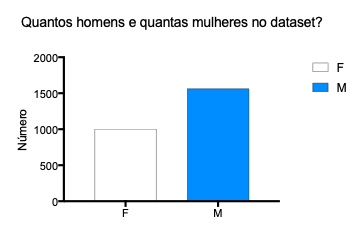

Como resultado da query temos mais homens do que mulheres nesse dataset

>> Pergunta 3: Quais as características dos clientes que possuem os maiores creditos?

In [ ]:
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10


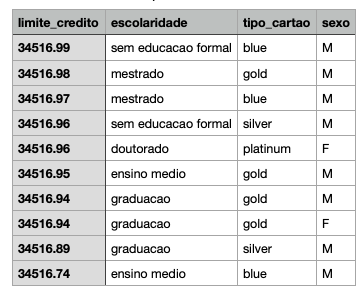

Resultado da query: existe uma heterogeneidade nos resultados, não há um padrão relacionado a escolaridade e sexo, por exemplo.

>> Pergunta 4: Quais as características dos clientes que possuem os menores creditos?

In [ ]:
select min(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by sexo



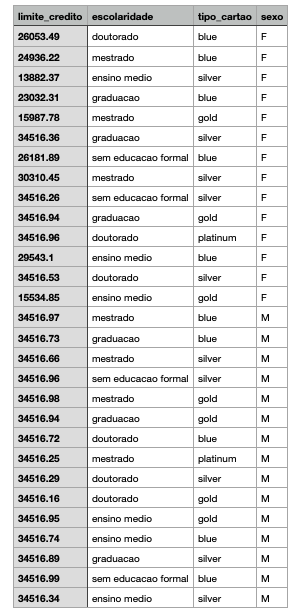

Resultado da query: Aqui requer uma análise estatistica para avaliar se há diferenca qunado relacionado a escolaridade e genero, por exemplo.

>> Pergunta 5: Será que as mulheres ou os homens gastam mais?

In [ ]:
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo


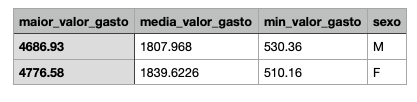

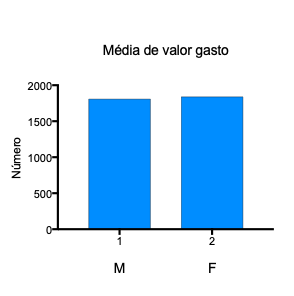

Resultado da query: Percebe-se que não há diferença significativa de média de valor gasto entre os gêneros.

>> Pergunta 6 : Agora mesma query anterior, mas por estado civil

In [ ]:
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, estado_civil
from credito
group by estado_civil


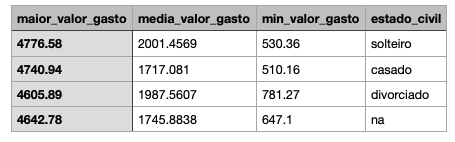

Resultado da query: Aqui já percebe-se uma diferença: solteiros e divorciados possuem uma média de gasto maior do que casados.

>> Pergunta 7: O salário impacta no limite?

In [ ]:
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc


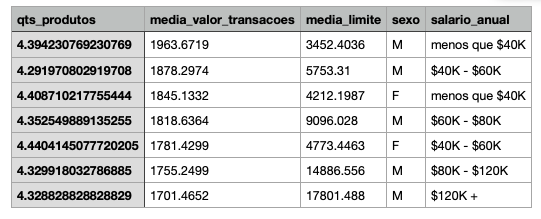

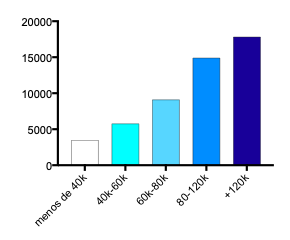

Resultado da query: A planilha mostra que sim, pessoas que tem menor faixa salarial também apresentam menor limite de credito. Esse crescimento é gradual.
* _O gráfico apresenta dados apenas do gênero masculino_

>> Pergunta 8: Qual a quantidade média de produtos no dataset?

In [ ]:
select avg(qtd_produtos) as qts_produtos
from credito;


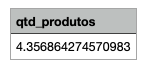

Resposta da query: a quantidade média de produtos é de 4.35

>> Pergunta 9: Qual a média de limite de crédito agrupada por gênero?

In [ ]:
select avg  (limite_credito)
from credito
group by sexo;


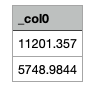

Resultado da query: Homens possuem limite de crédito bem maior do que mulheres, praticamente o dobro.

**CONCLUSÃO**

Alguns insights obtidos:
* a maior parte dos clientes possui renda até 40K
* a maior parte dos clientes é masculino
* a escolaridade não parece influenciar no limite nem no tipo do cartão
* os clientes com maiores limites são em sua maioria homens
* a faixa salarial impacta diretamente no limite de crédito
* solteiros e divorciados possuem uma média de gasto maior do que casados


